In [1]:
import sys

In [2]:
sys.path.insert(0, '/home/ec2-user/SageMaker/Data-Science/data')

In [3]:
from model import ModelMaker

Using TensorFlow backend.


In [4]:
sys.path

['/home/ec2-user/SageMaker/Data-Science/data',
 '',
 '/home/ec2-user/anaconda3/envs/riskylobster/lib/python36.zip',
 '/home/ec2-user/anaconda3/envs/riskylobster/lib/python3.6',
 '/home/ec2-user/anaconda3/envs/riskylobster/lib/python3.6/lib-dynload',
 '/home/ec2-user/anaconda3/envs/riskylobster/lib/python3.6/site-packages',
 '/home/ec2-user/anaconda3/envs/riskylobster/lib/python3.6/site-packages/IPython/extensions',
 '/home/ec2-user/.ipython']

In [5]:
mm = ModelMaker(symbol='AAPL')

In [6]:
lstm_layers = [[361, 196, 64], [300 ,200, 50]]
dropouts = [[0.2, 0.2, 0.2]]
l_rate = [.007, .025]
p = [0.001]
decay = [0.0001]
loss = ['mean_squared_logarithmic_error']
seq_length = [30]
batch_size = [15]
epochs = [30]
from keras.models import Sequential

p_grid = {'lstm_layers':lstm_layers, 
          'dropouts':dropouts,
          'l_rate':l_rate,
          'p':p,
          'decay':decay,
          'loss':loss,
          'seq_length':seq_length,
          'batch_size':batch_size,
          'epochs':epochs
         }

In [7]:
res, best = mm.fit_model(param_grid=p_grid)

################################################################### 
 Ticker:  AAPL 
 Last Refreshed:  2019-09-24 13:28:05 
 Data Retrieved:  Daily Time Series with Splits and Dividend Events 
 ###################################################################
################################################################### 
 Ticker:  AAPL 
 Fundamentals Retrieved:  ['AAPL_open' 'AAPL_high' 'AAPL_low' 'AAPL_close' 'AAPL_adjusted_close'
 'AAPL_volume' 'AAPL_dividend_amount' 'AAPL_totalrevenue'
 'AAPL_totalcostofrevenue' 'AAPL_totalgrossprofit'
 'AAPL_totalpretaxincome' 'AAPL_weightedavebasicdilutedsharesos'
 'AAPL_cashdividendspershare'] 
 ###################################################################
################################################################### 
 Ticker:  AAPL 
 Retrieved Data Start Date:  2009-07-22 
 Retrieved Data End Date:  2019-07-31 
 Data Retrieved:  ['AAPL_totalrevenue', 'AAPL_totalcostofrevenue', 'AAPL_totalgrossprofit', 'AAPL_totalpretaxincome'

/home/ec2-user/SageMaker/Data-Science/data/fin_data.py:295: UserWarning: The latest value available for Housing Index is from January 2019.
  warnings.warn("The latest value available for Housing Index is from January 2019.")


################################################################### 
 Index: Yale Investor Behavior Project Added 
 ###################################################################
################################################################### 
 Trade Weighted U.S. Dollar Index: Broad Added 
 ###################################################################
################################################################### 
 US Treasury Bond Long-Term Rates Added 
 ###################################################################
################################################################### 
 US Treasury Bond Short-Term Rates Added 
 ###################################################################
8_Wk_DR is missing  4227
8_Wk_DR dropped
8_Wk_CE is missing  4227
8_Wk_CE dropped
52_Wk_DR is missing  1610
52_Wk_DR dropped
52_Wk_CE is missing  1610
52_Wk_CE dropped


/home/ec2-user/SageMaker/Data-Science/data/fin_data.py:336: UserWarning: Contains Null Values
  warnings.warn("Contains Null Values")


nulls in target =  0
Instructions for updating:
Colocations handled automatically by placer.


/home/ec2-user/anaconda3/envs/riskylobster/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
 - 55s - loss: 1.3094 - val_loss: 0.7702

Epoch 00001: val_loss improved from inf to 0.77016, saving model to /home/ec2-user/SageMaker/Data-Science/jupyter_notebooks/modeling/results/best_weights.01-0.77.hdf5
Epoch 2/30
 - 50s - loss: 0.1462 - val_loss: 0.8398

Epoch 00002: val_loss did not improve from 0.77016
Epoch 3/30
 - 50s - loss: 0.0942 - val_loss: 0.3941

Epoch 00003: val_loss improved from 0.77016 to 0.39406, saving model to /home/ec2-user/SageMaker/Data-Science/jupyter_notebooks/modeling/results/best_weights.03-0.39.hdf5
Epoch 4/30
 - 50s - loss: 0.0750 - val_loss: 0.3383

Epoch 00004: val_loss improved from 0.39406 to 0.33825, saving model to /home/ec2-user/SageMaker/Data-Science/jupyter_notebooks/modeling/results/best_weights.04-0.34.hdf5
Epoch 5/30
 - 50s - loss: 0.0630 - val_loss: 0.2659

Epoch 00005:

In [15]:
be = res.best_estimator_

In [16]:
dir(be)

['_KerasRegressorGenerator__history',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'build_fn',
 'check_params',
 'create_gens',
 'extract_data',
 'filter_sk_params',
 'fit',
 'get_params',
 'history',
 'model',
 'predict',
 'score',
 'set_params',
 'sk_params',
 'train_data_generator',
 'val_data_generator']

In [27]:
from keras.preprocessing.sequence import TimeseriesGenerator
import numpy as np

In [28]:
def create_gens(X, y, seq_length=30, batch_size=15):
    generator = TimeseriesGenerator(X, y,
                                    length=seq_length,
                                    sampling_rate=1,
                                    stride=1,
                                    batch_size=batch_size)
    return generator

def extract_data(generator):
    for i in np.arange(len(generator)):
        if i == 0:
            a, b = generator[i]
        else:
            c, d = generator[i]

            a = np.vstack((a, c))
            b = np.vstack((b, d))

    return a, b

In [33]:
X, y = extract_data(create_gens(mm.X_test, mm.y_test, seq_length=seq_length[0], batch_size=batch_size[0]))
y_pred = be.predict(X)

In [32]:
import matplotlib.pyplot as plt

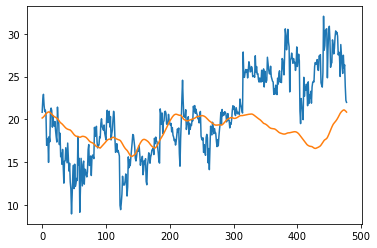

In [34]:
plt.plot(y)
plt.plot(y_pred)

In [35]:
def individual_array(sample):
    
    # get the means for each sampling
    for i in np.arange(len(sample[0])):
        means = []
        for j in np.arange(len (sample)):
            means.append(sample[j][i])
        s_value = np.array(np.mean(means))

        if i == 0:
            final_array = s_value
        else:
            final_array = np.hstack((final_array, s_value))
            
    return final_array

In [36]:
def flatten_shap_values(shap_vals):
    
    #Pull the array out of the list. 
    sv = shap_vals[0]
    
    count = 0
    for sample in sv: 
        sample_array = individual_array(sample)
        if count == 0:
            final_array = sample_array
        else:
            final_array = np.vstack((final_array, sample_array))
        
        count +=1
        
    return final_array

In [38]:
from shap import DeepExplainer, summary_plot

In [42]:
de = DeepExplainer(model = be.model, data=X)

In [43]:
shap_vals = de.shap_values(X)

In [44]:
print(shap_vals[0].shape) 
print(shap_vals[0][0].shape)
print(shap_vals[0][0][0].shape)

(478, 30, 32)
(30, 32)
(32,)


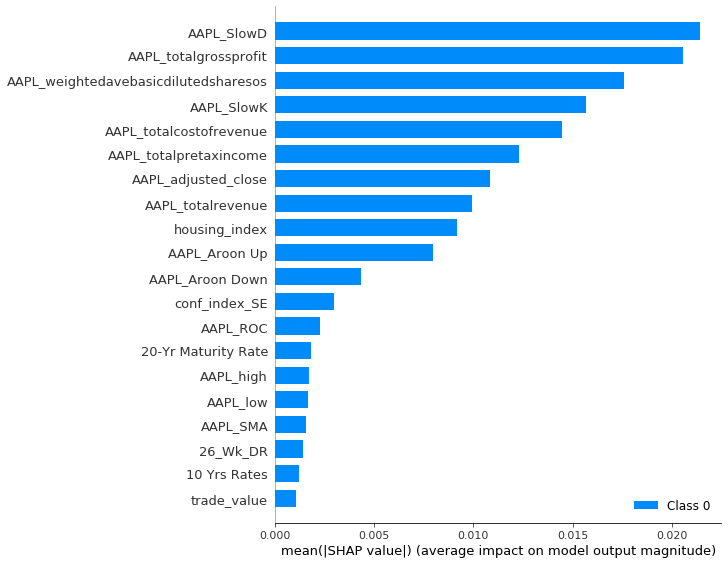

In [48]:
summary_plot([shap_vals[0][100]], feature_names=mm.X_cols)

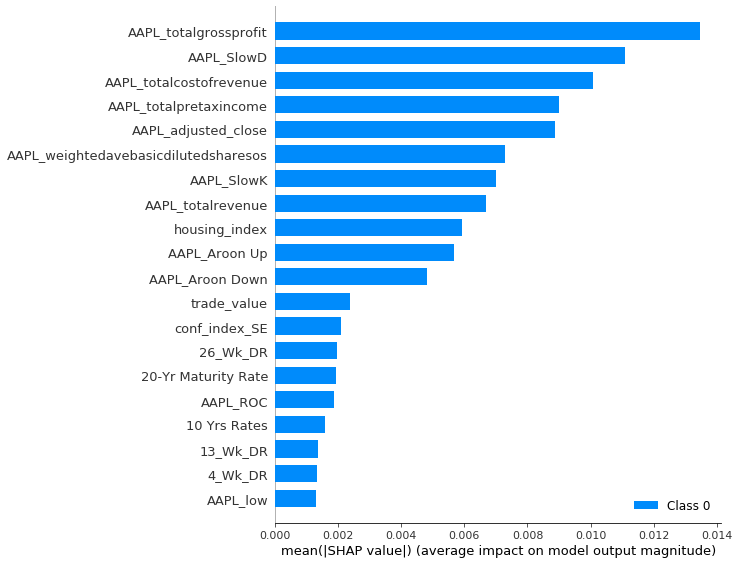

In [49]:
summary_plot([flatten_shap_values(shap_vals)], 
             feature_names=(mm.X_cols))

['X_cols',
 'X_test',
 'X_train',
 'X_val',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'create_model',
 'fit_model',
 'fundamentals',
 'get_data',
 'macros',
 'shift',
 'symbol',
 'technicals',
 'y_test',
 'y_train',
 'y_val']

In [1]:
import os

In [12]:
curdir = os.getcwd() + '/results'

In [13]:
try:
    os.stat(str(curdir))
except:
    os.mkdir(str(curdir))

In [14]:
curdir

'/mnt/sdd1/Documents/LambdaSchool/labs_ir/repos/automation/Data-Science/jupyter_notebooks/modeling/results'

In [15]:
tdict = {'a':1, 'b': 2, 'c':3}

In [21]:
if 'd' in tdict:
    print('yes')
else:
    print('no')

no


In [29]:
def test_f(a, **kwargs):
    if a not in kwargs:
        print('no')
    else:
        print('ya')
    print(kwargs.keys())

In [37]:
test_f('e', b=1, c=2, d=3)

no
dict_keys(['b', 'c', 'd'])
